<center><img src="fen.png" width = "250px"></center>
<i><h2 style="text-align:center;color:#004d80"> Análisis de encuesta de innovación y emprendimiento para estudiantes de instituciones de educación superior en la Región del Maule</h2></i>
<i><h3 style="text-align:center;color:#FFFFF">Joaquín Callejón Guzmán </h3></i></i>
<i><h3 style="text-align:center;color:#FFFFF">Christian Vergara Retamal </h3></i></i>

<hr style="border:3px solid gray"> </hr>

## Imports librerías y csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
import re
import nltk
import Levenshtein as lvs
from wordcloud import WordCloud, STOPWORDS
import plot_functions as pf
import aux_functions as af

In [2]:
# Leemos el csv de preguntas y respuestas
dataframe = pd.read_csv("Encuesta Consultoría.csv")

#### Definir plt style & size

In [3]:
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (10, 6) 

<hr style="border:3px solid gray"> </hr>

### Visualización dataframe

In [4]:
# Obtenemos filas y columnas del dataframe
shape = dataframe.shape

In [5]:
print("El dataframe consta de {} preguntas y {} respuestas".format(shape[1], shape[0]))

El dataframe consta de 18 preguntas y 135 respuestas


In [6]:
# Primeros dos registros del dataframe 
#dataframe.head(2)

In [7]:
# Últimos dos registros del dataframe 
#dataframe.tail(2)

<hr style="border:3px solid gray"> </hr>

## Modificación de columnas 
* La modificación se realiza con el objetivo de facilitar el análisis de los datos

In [8]:
# Creación de un dataframe auxiliar copiando los datos del df original
df_auxiliar = pd.DataFrame()

In [9]:
# Creación de las respectivas columnas, con nombre modificado (PREGUNTAS GENERALES)
df_auxiliar['rut'] = dataframe['Indicanos tu Rut o Pasaporte']
df_auxiliar['edad'] = dataframe['¿Cuál es tu Edad?']
df_auxiliar['institucion'] = dataframe['Institución a la que perteneces']
df_auxiliar['carrera'] = dataframe['Carrera que cursa']
df_auxiliar['año'] = dataframe['Año que cursa']
df_auxiliar['correo'] = dataframe['Correo']

In [10]:
# Creación de las respectivas columnas, con nombre modificado (PREGUNTAS TEMÁTICA)
df_auxiliar['pregunta_1'] = dataframe['¿Consideras que emprender es una opción laboral? (Puedes realizar comentarios en esta pregunta)']
df_auxiliar['pregunta_2'] = dataframe['¿Has recibido formación en áreas de innovación y/o emprendimiento? (Puedes elegir más de una opción) ']
df_auxiliar['pregunta_3'] = dataframe['En el caso de haber recibido formación en áreas de innovación y/o emprendimiento. Según la siguiente escala, ¿Qué tan satisfecho estás con el conocimiento adquirido? (Puedes comentar en la casilla \'Otro\')']
df_auxiliar['pregunta_4'] = dataframe['¿Tienes conocimiento sobre temáticas de propiedad intelectual e industrial y sus aplicaciones? (por ejemplo, en emprendimientos o desarrollos tecnológicos entre Empresas y Universidades) ']
df_auxiliar['pregunta_5'] = dataframe['Además de estudiar, ¿realizas alguna actividad remunerada?']
df_auxiliar['pregunta_6'] = dataframe['Si eres Emprendedor: ¿En qué área desarrollas este emprendimiento? ']
df_auxiliar['pregunta_7'] = dataframe['Si eres emprendedor, ¿Has recibido subsidio por parte del estado?']
df_auxiliar['pregunta_8'] = dataframe['¿Cuales son las principales problemáticas a la hora de tener un emprendimiento?']
df_auxiliar['pregunta_9'] = dataframe['¿Consideras que cuentas con información y/o formación suficiente para la generación de un emprendimiento?']
df_auxiliar['pregunta_10'] = dataframe['En tu institución de educación superior ¿Existe una Unidad que apoye el emprendimiento? (Si conoce la unidad, especifica el nombre en la casilla \'Otro\')']

In [11]:
# Observamos las columnas que contendrá el nuevo dataframe
df_auxiliar.columns

Index(['rut', 'edad', 'institucion', 'carrera', 'año', 'correo', 'pregunta_1',
       'pregunta_2', 'pregunta_3', 'pregunta_4', 'pregunta_5', 'pregunta_6',
       'pregunta_7', 'pregunta_8', 'pregunta_9', 'pregunta_10'],
      dtype='object')

<hr style="border:3px solid gray"> </hr>

## Funciones para columnas específicas

### Edad

In [12]:
def age_group(age):
    """
    La función age_group categoriza la edad en grupos o rango etario
    en un intervalo de tres años.
    Parámetros : 
        'age' : edad a categorizar
    """
    age = int(age)
    tmp = ''
    if age < 17:
        tmp = '<17'
    if age in range(17,21):
        tmp = '17-20'
    if age in range(21,25):
        tmp = '21-24'
    if age in range(25,29):
        tmp = '25-28'
    if age in range(29,32):
        tmp = '29-32'
    if age > 32:
        tmp = '32+'    
    return tmp

In [13]:
# Aplicamos la función creada a cada uno de los valores de la columna edad
# salvando el respectivo rango etario en la nueva columna 'age_group'
df_auxiliar['age_group'] = df_auxiliar['edad'].apply(age_group)

In [14]:
# Obtenemos la cantidad de personas para cada rango etario
df_auxiliar['age_group'].value_counts()

21-24    95
17-20    25
25-28    11
29-32     2
32+       2
Name: age_group, dtype: int64

<hr style="border:2px solid gray"> </hr>

### Carrera
* Las funciones que se aplicarán tienen como objetivo estandarizar las carreras

#### Carrera a mayúsculas

In [15]:
# Aplicamos upper (texto a mayúsculas) a cada valor de la columna carrera
df_auxiliar['carrera'] = df_auxiliar['carrera'].apply(lambda x: x.upper())

#### Eliminar tildes

In [16]:
# Definimos la funcion 'normalize' para eliminar los tildes
def normalize(sentence):
    """
    La función normalize elimina los tildes de una oración específica.
    Parámetros:
        'sentence' : Texto a eliminar los tíldes.
    """
    replacements = (
        ("Á", "A"),
        ("É", "E"),
        ("Í", "I"),
        ("Ó", "O"),
        ("Ú", "U"),
    )
    for a, b in replacements:
        sentence = sentence.replace(a, b).replace(a,b)
    return sentence

In [17]:
# Aplicamos 'normalize' a cada valor de la columna carrera
df_auxiliar['carrera'] = df_auxiliar['carrera'].apply(lambda x : normalize(x))

In [18]:
# Observamos las carreras en mayúsculas y sin tildes
#df_auxiliar['carrera'].values

#### Eliminar puntos

In [19]:
df_auxiliar['carrera'] = df_auxiliar['carrera'].str.replace('.', '')

In [20]:
#df_auxiliar['carrera'].values

#### Expresiones regulares para estandarizar nombres de carerras

<hr style="border:3px solid gray"> </hr>

# Preguntas de temática

<hr style="border:2px solid gray"> </hr>

## Pregunta 1
### *¿Consideras que emprender es una opción laboral?* 

#### WordCloud 

In [21]:
# Utilizamos el archivo 'sp_words', el cuál contiene palabras que se
# omitiran al generar el wordcloud. Por ej. 'de', 'un', 'una', 'y', etc.
spanish_words = open('sp_words.txt').read().splitlines()

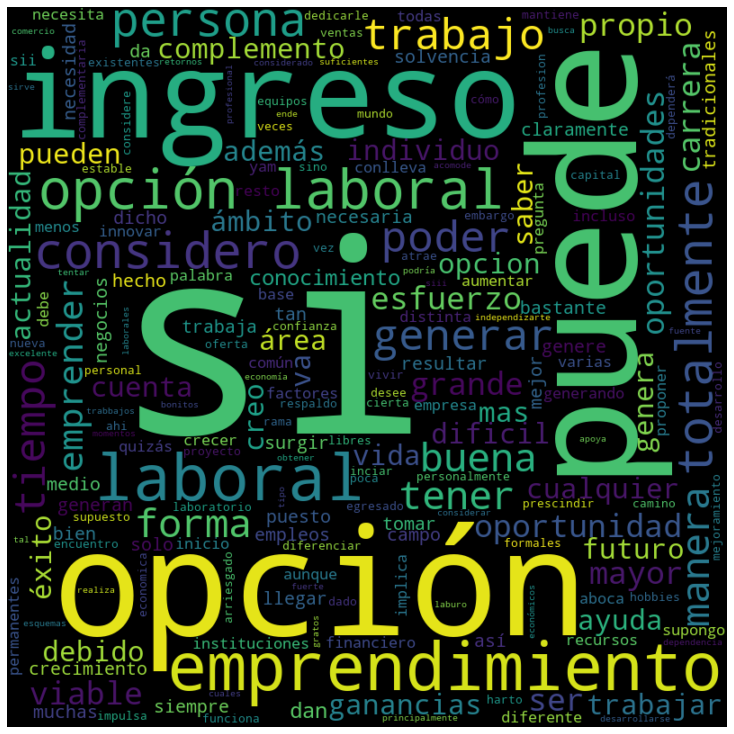

In [22]:
# Generamos la nube de palabras más utilizadas en los comentarios de la pregunta 1
# mediante la función wordcloud
pf.wordCloud(df_auxiliar, 'pregunta_1', spanish_words)

#### Frecuencia de palabras

#### Análisis de sentimientos

<hr style="border:2px solid gray"> </hr>

## Pregunta 2
### *¿Has recibido formación en áreas de innovación y/o emprendimiento?* 

#### Separar respuestas

In [23]:
# Utilizamos la función 'splitAnswer' con el objetivo de obtener
# en columnas separadas las respuestas de la pregunta 2 en caso de ser doble
af.splitAnswers(df_auxiliar, 'pregunta_2')

In [25]:
# Observamos las columnas de nuestro dataset, se identifica la pregunta_2,
# ya dividida en caso de existir respuesta doble
df_auxiliar.columns

Index(['rut', 'edad', 'institucion', 'carrera', 'año', 'correo', 'pregunta_1',
       'pregunta_2.1', 'pregunta_2.2', 'pregunta_3', 'pregunta_4',
       'pregunta_5', 'pregunta_6', 'pregunta_7', 'pregunta_8', 'pregunta_9',
       'pregunta_10', 'age_group'],
      dtype='object')

In [35]:
# Ejemplificamos la acción anterior con un caso de respuesta doble
df_auxiliar.loc[2]

rut                                                     202697091
edad                                                           21
institucion                                  UNIVERSIDAD DE TALCA
carrera                     INGENIERIA EN INFORMATICA EMPRESARIAL
año                                                    Cuarto año
correo                              gbasualto18@alumnos.utalca.cl
pregunta_1      Sí, puesto que muchas veces se puede llegar al...
pregunta_2.1                                    Si, en mi carrera
pregunta_2.2                      Si, a través de cursos externos
pregunta_3                                                Regular
pregunta_4                        No mucho, pero estoy interesado
pregunta_5                                       No, solo estudio
pregunta_6                                     No soy Emprendedor
pregunta_7                                                    NaN
pregunta_8      Acceso a financiamiento;Problemas de planifica...
pregunta_9